In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# Library to overcome Warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("HR_Employee_Attrition_Data.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.shape

(2940, 35)

Inference:
1. There are total 2940 Records/Rows in the dataset.
2. There are total 35 Features/columns in the dataset.

In [3]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Columns: 35 entries, Age to YearsWithCurrManager
dtypes: int64(26), object(9)
memory usage: 804.0+ KB


Inference:
1. There are only 26 Numerical Attributes in the dataset.
2. On the other hand we have 9 Categorical Attributes.

In [137]:
object_columns = df.select_dtypes(include=['object']).columns 
object_columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [136]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
df.select_dtypes(include="O")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
2935,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
2936,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
2937,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
2938,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [14]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [15]:
df.duplicated().sum()

0

There's No Duplicate Records present in the Dataset.

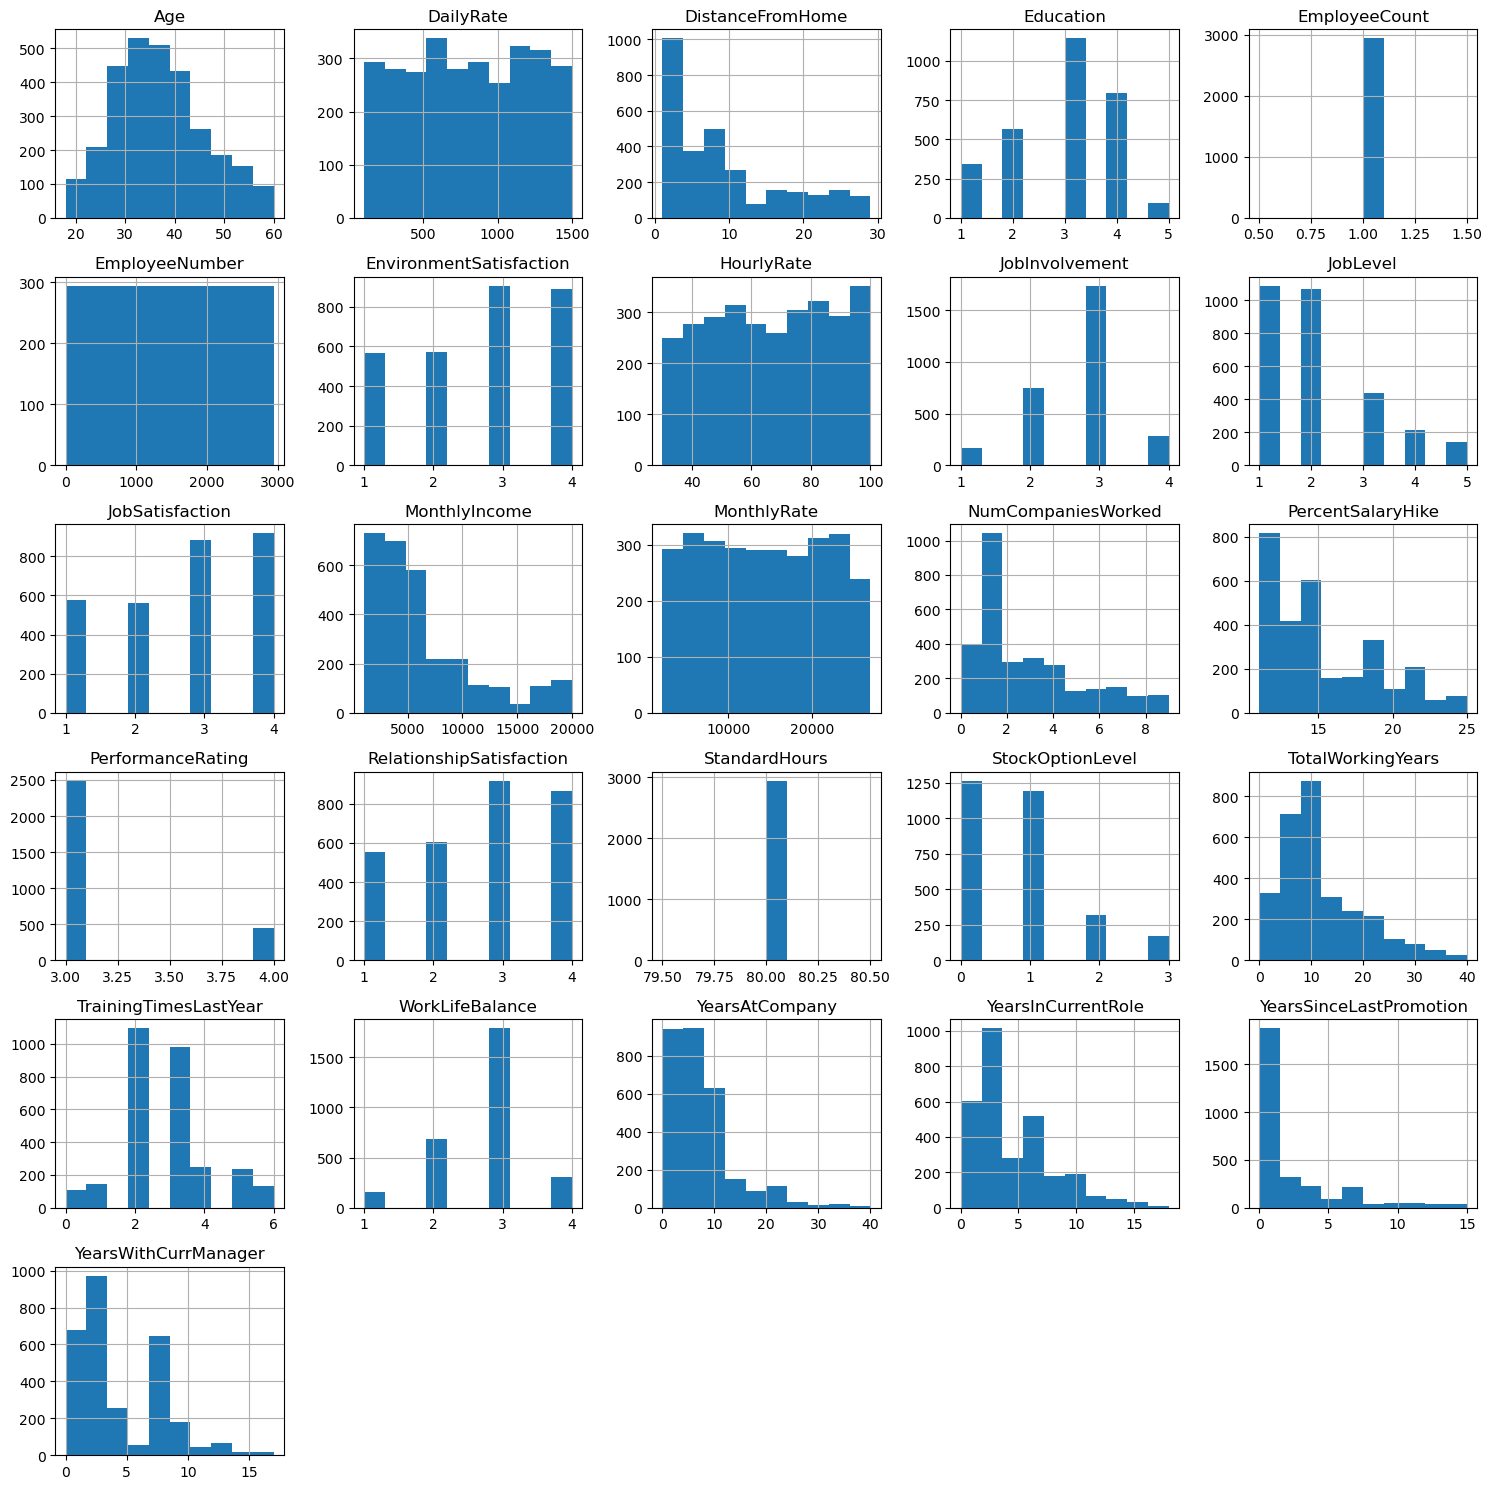

In [16]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

'Employee Count' and 'StandardHours' features are redundant and can be removed from
the analysis.

Most distributions are right-skewed (Monthly Income, Total Working Years, Year at
Company, Distance From Home, etc.)

The age feature is a little right-skewed, and most of the employees have ages between
25–40 years.

In [4]:
df.drop('EmployeeCount',axis=1,inplace=True)
df.drop('StandardHours',axis=1,inplace=True)

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,3,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,5,1,...,3,4,1,6,3,3,2,2,2,2


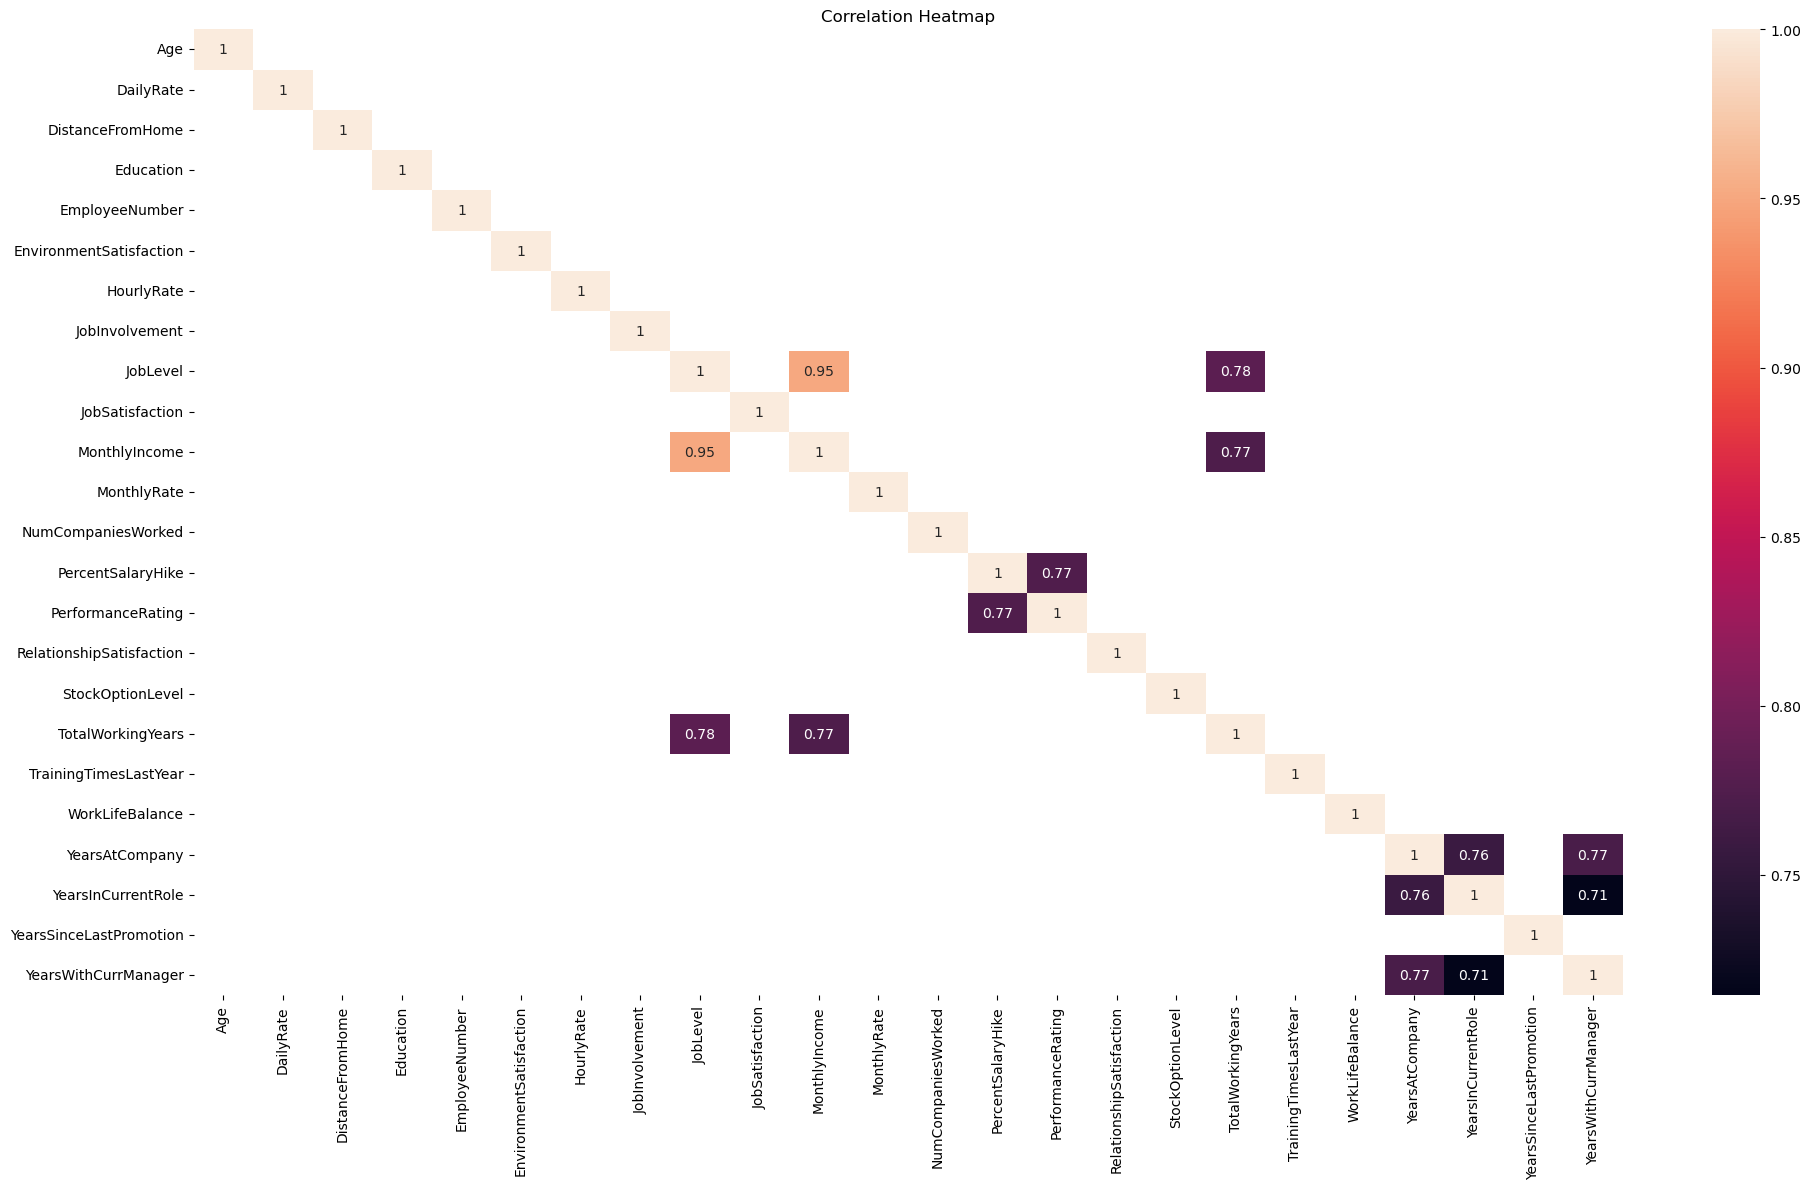

In [141]:
corr_mat = df.corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.7]

# Plot correlation heatmap
fig, ax = plt.subplots(1,1, figsize = (20,12))
sns.heatmap(high_corr_mat,annot=True)
title = plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


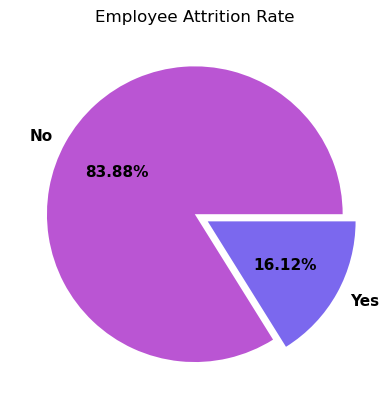

In [37]:
attrition_rate = df["Attrition"].value_counts()
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"fontweight":"black","size":11},
        colors = ["#ba55d3","#7b68ee"],explode=[0,0.1])
plt.title("Employee Attrition Rate")
plt.show()

1. The employee attrition rate of this organization is 16.12%.
2. According to experts in the field of Human Resources, says that the attrition rate 4% to 6% is normal in organization.
3. So we can say the attrition rate of the organization is at a dangerous level.
4. Therefore the organization should take measures to reduce the attrition rate.

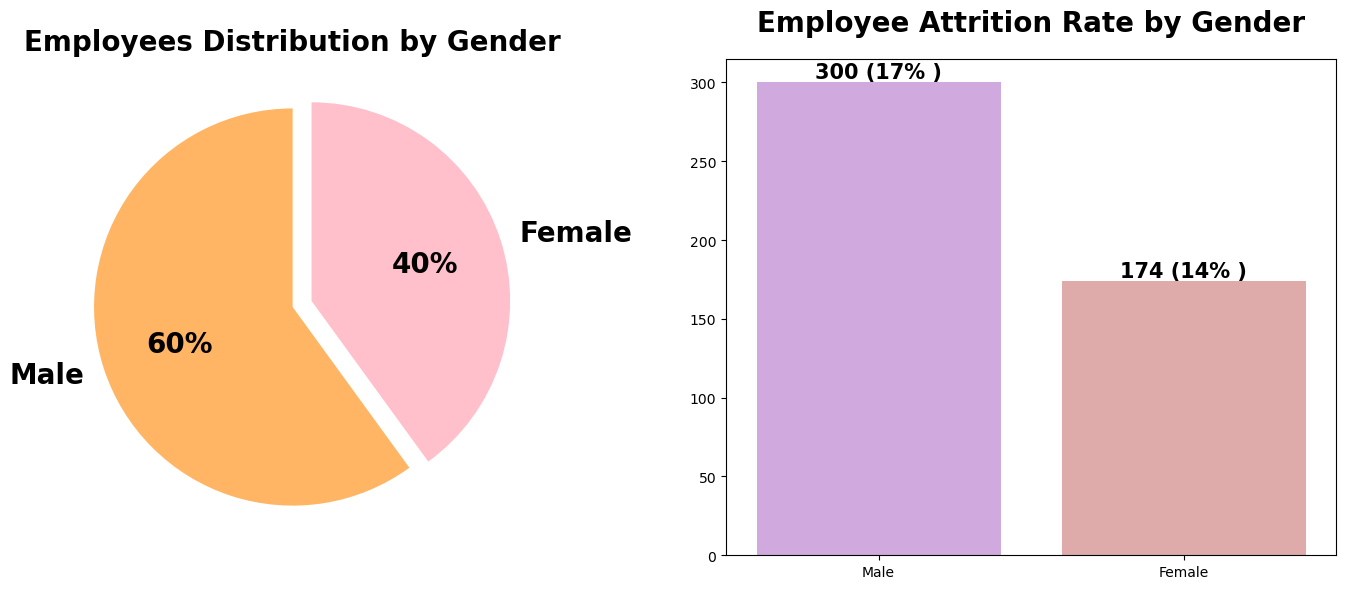

In [12]:
#Visualization to show Total Employees by Gender.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
gender_attrition = df["Gender"].value_counts()
plt.title("Employees Distribution by Gender",fontweight="black",size=20)
plt.pie(gender_attrition, autopct="%.0f%%",labels=gender_attrition.index,textprops=({"fontweight":"black","size":20}),
        explode=[0,0.1],startangle=90,colors= ["#ffb563","#FFC0CB"])


#Visualization to show Employee Attrition by Gender.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_1 = df["Gender"].value_counts()
value_2 = new_df["Gender"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,palette=["#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition Rate by Gender",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


Male employees are leaving more from the organization compared to female employees.

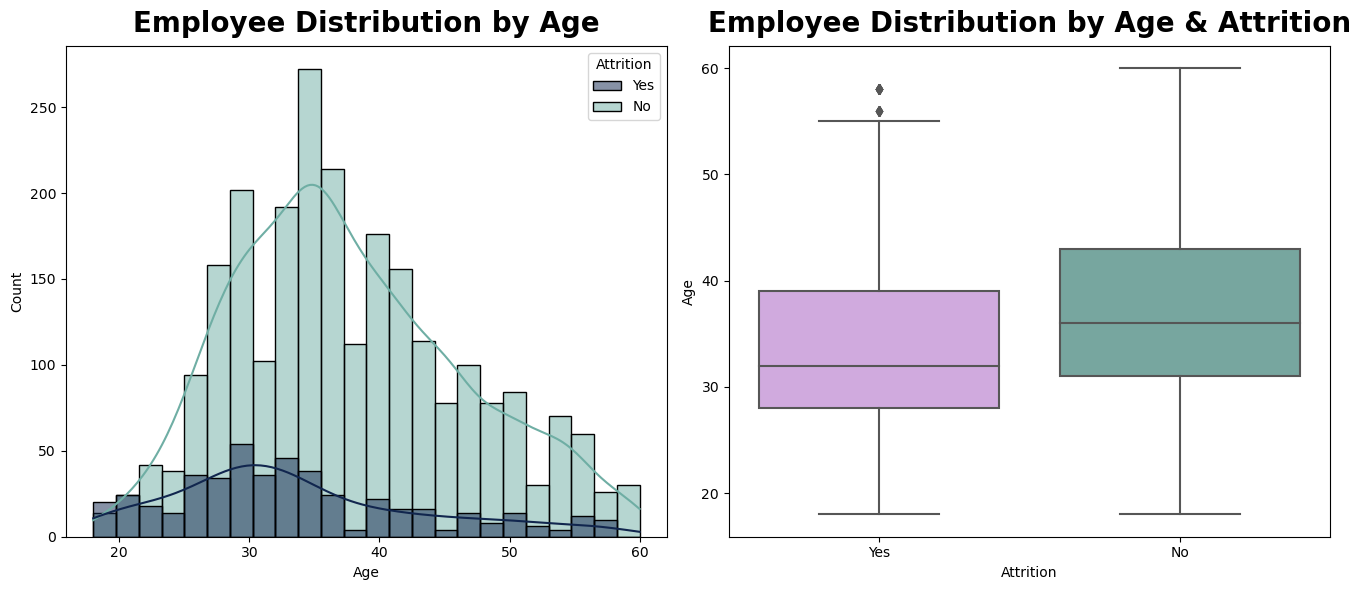

In [19]:
#Visualization to show Employee Distribution by Age.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="Age",hue="Attrition",data=df,kde=True,palette=["#11264e","#6faea4"])
plt.title("Employee Distribution by Age",fontweight="black",size=20,pad=10)


#Visualization to show Employee Distribution by Age & Attrition.
plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="Age",data=df,palette=["#D4A1E7","#6faea4"])
plt.title("Employee Distribution by Age & Attrition",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

1. Most of the emloyees are between age 30 to 40.
2. We can clearly observe a trend that as the age is increasing the attrition is decreasing.

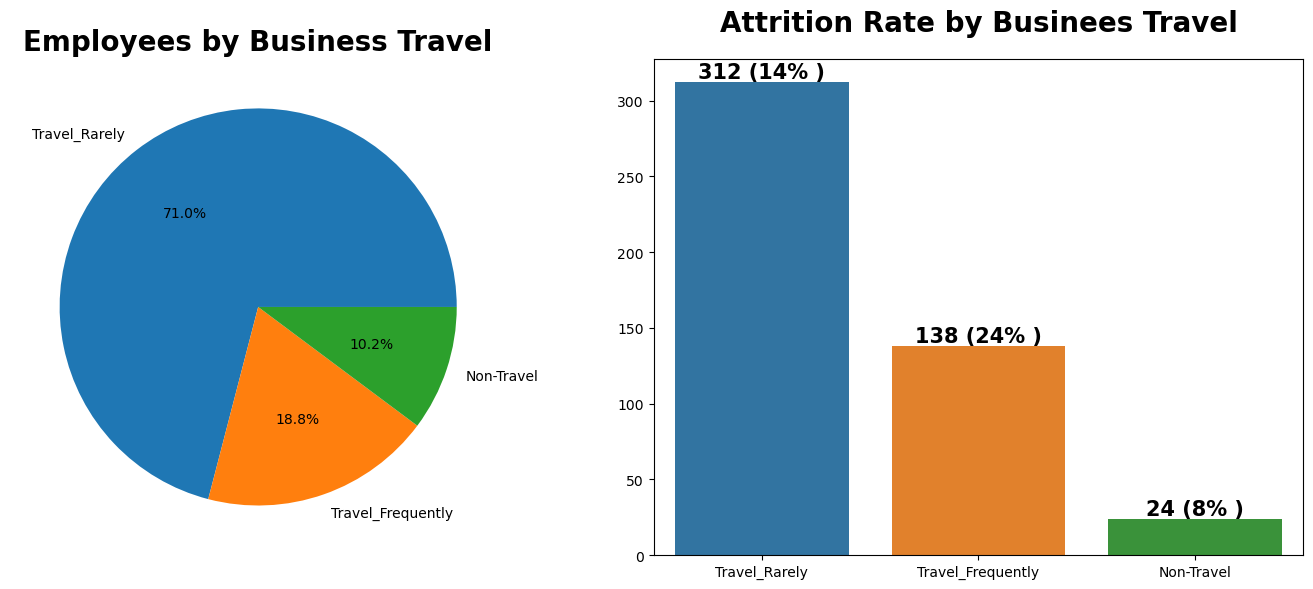

In [25]:
#Visualization to show Total Employees by Businees Travel.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["BusinessTravel"].value_counts()
plt.title("Employees by Business Travel", fontweight="black", size=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%")

#Visualization to show Attrition Rate by Businees Travel.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["BusinessTravel"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values

sns.barplot(x=value_2.index,y=value_2.values)
plt.title("Attrition Rate by Businees Travel",fontweight="black",size=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

Inference:
1. Most of the employees in the organization Travel Rarely.
2. Highest employee attrition can be observed by those employees who Travels Frequently.
3. Lowest employee attrition can be observed by those employees who are Non-Travel.

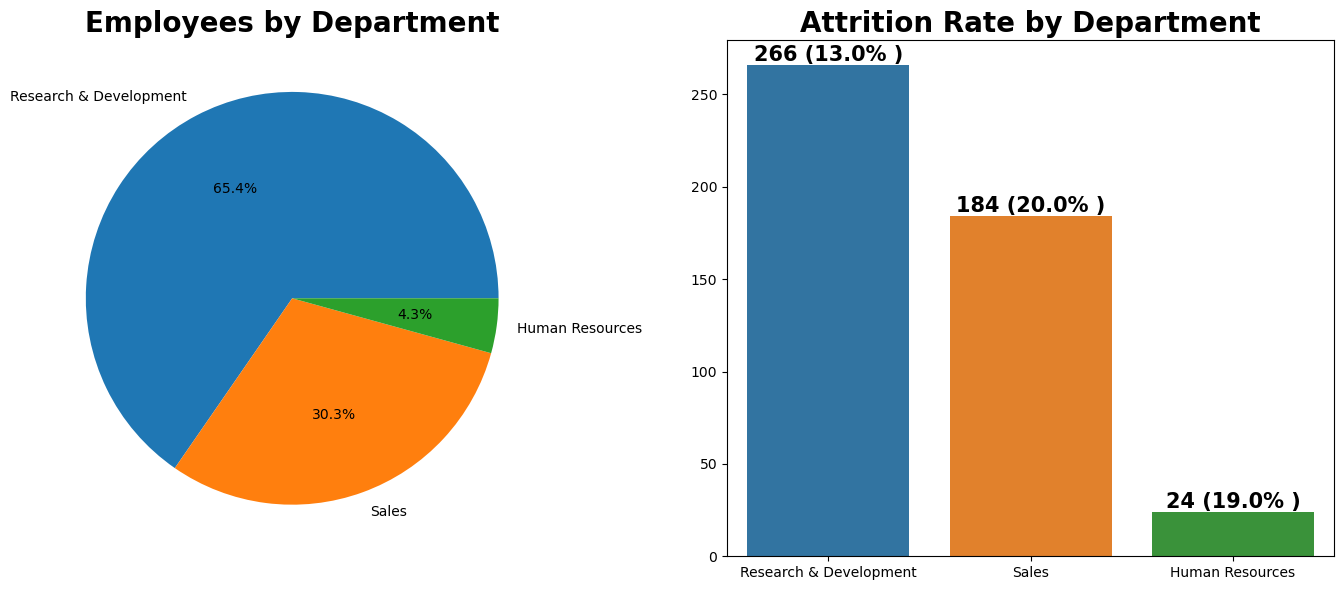

In [31]:
#Visualization to show Total Employees by Department.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["Department"].value_counts()
plt.title("Employees by Department", fontweight="black", size=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%")

#Visualization to show Employee Attrition Rate by Department.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["Department"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,)
plt.title("Attrition Rate by Department",fontweight="black",size=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

1. Most of the employees are from Research & Development Department.
2. Highest Attrition is in the Sales Department.

In [27]:
#Analyzing Employee Attrition by DailyRate.
#To generate meaningful insights we can cut Daily Rates into three groups for meaningful analysis.
df["DailyRate"].describe()

count    2940.000000
mean      802.485714
std       403.440447
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

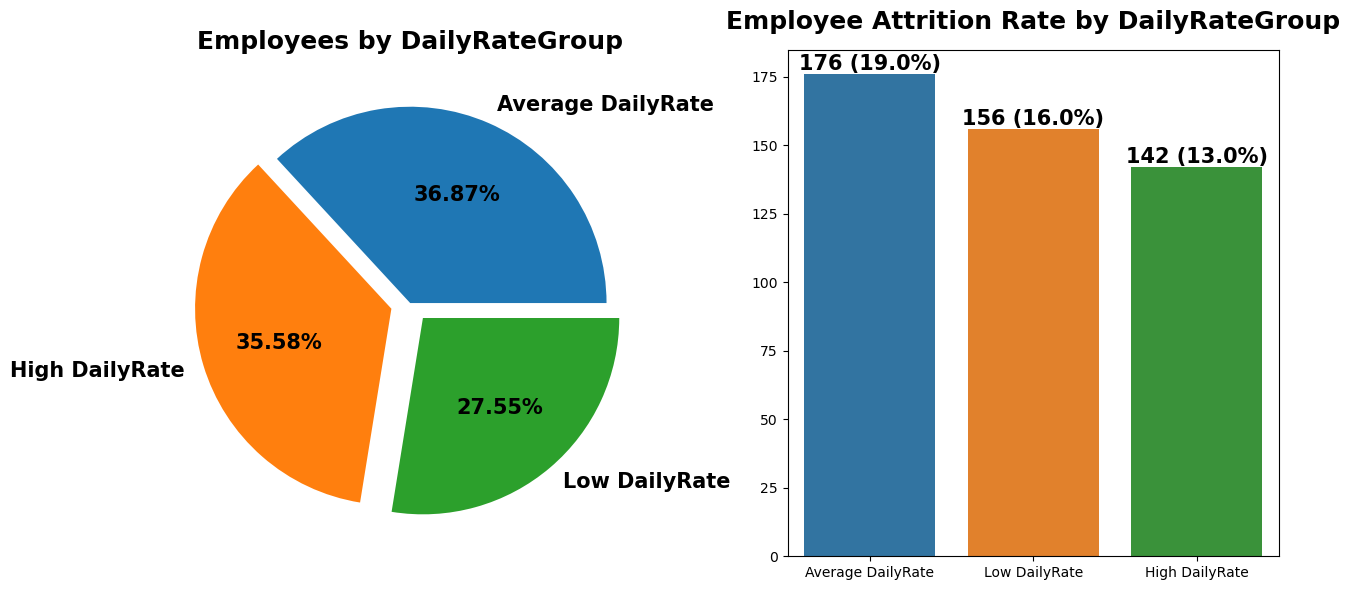

In [33]:
# Define the bin 
bin_edges = [0, 500, 1000, 1500]

# Define the labels for the groups
bin_labels = ['Low DailyRate', 'Average DailyRate', 'High DailyRate']

# Cut the DailyRate column into groups
df['DailyRateGroup'] = pd.cut(df['DailyRate'], bins=bin_edges, labels=bin_labels)

##Visualization to show Total Employees by DailyRateGroup.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = df["DailyRateGroup"].value_counts()
plt.pie(value_1.values, labels=value_1.index,autopct="%.2f%%",textprops={"fontweight":"black","size":15},
        explode=[0,0.1,0.1])
plt.title("Employees by DailyRateGroup",fontweight="black",size=18)


#Visualization to show Attrition Rate by DailyRateGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["DailyRateGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(),y= value_2.values)
plt.title("Employee Attrition Rate by DailyRateGroup",fontweight="black",pad=15,size=18)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",fontweight="black",size=15)

plt.tight_layout()
plt.show()

In [34]:
#Analyzing Employee Attrition by Distance From Home.
df["DistanceFromHome"].describe()

count    2940.000000
mean        9.192517
std         8.105485
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [38]:
# Define the bin 
bin_edges = [0,2,5,10,30]

# Define the labels for the groups
bin_labels = ['0-2 kms', '3-5 kms', '6-10 kms',"10+ kms"]

# Cuttinf the DistaanceFromHome column into groups
df['DistanceGroup'] = pd.cut(df['DistanceFromHome'], bins=bin_edges, labels=bin_labels)

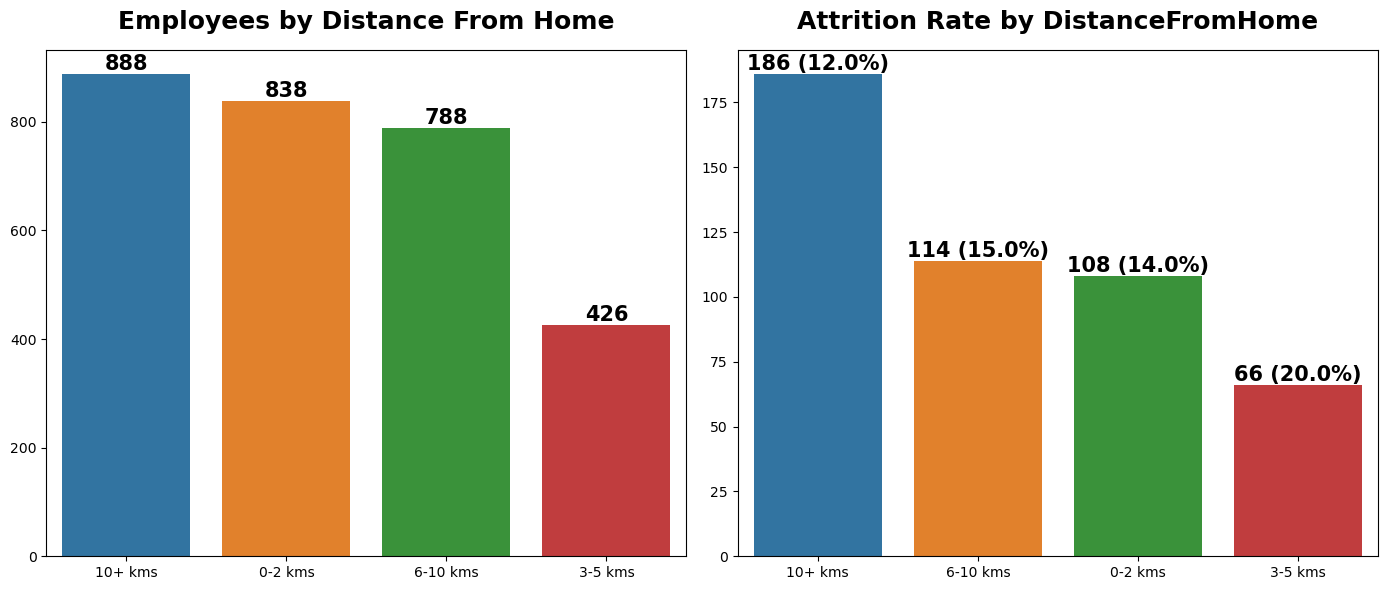

In [41]:
##Total Employees by DistnaceFromHome.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["DistanceGroup"].value_counts()
sns.barplot(x=value_1.index.tolist(), y=value_1.values)
plt.title("Employees by Distance From Home",fontweight="black",pad=15,size=18)
for index, value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)
    
#Attrition Rate by DistanceFromHome.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["DistanceGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(),y= value_2.values)
plt.title("Attrition Rate by DistanceFromHome",fontweight="black",pad=15,size=18)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",fontweight="black",size=15)

plt.tight_layout()
plt.show()

1.The feature Distance From Home doesn't follows any trend in attrition rate.
2. Employees staying close to the organization are mostly leaving compared to employees staing far from the oragnization.

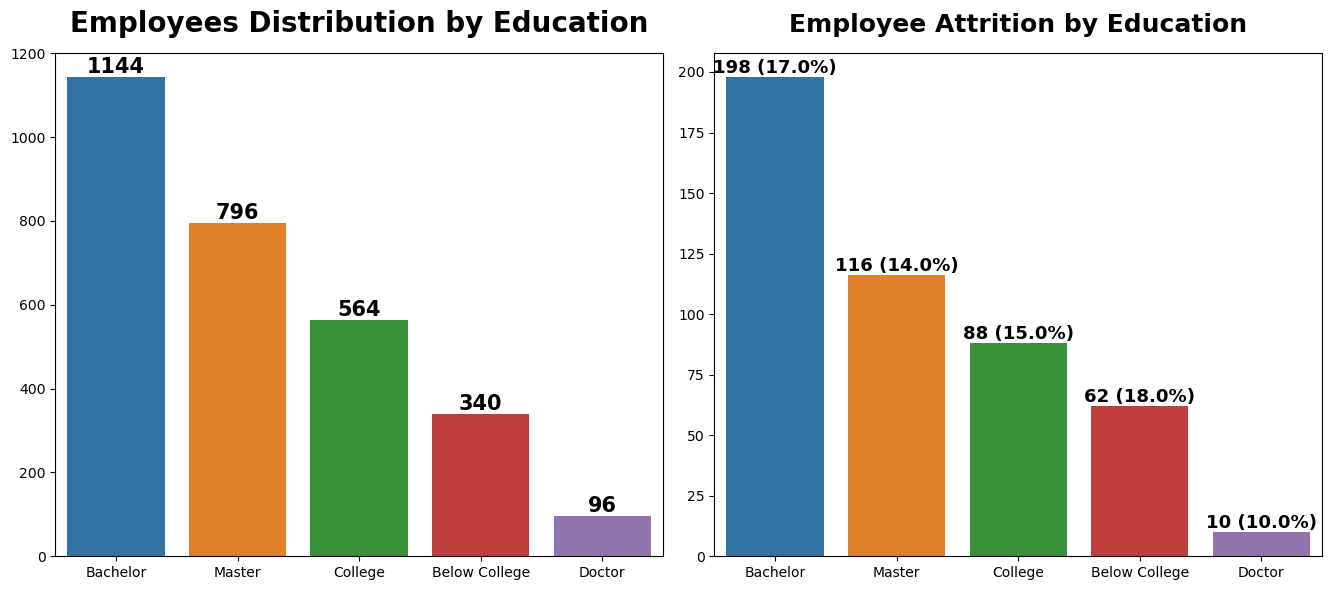

In [46]:
#Visualization to show Total Employees by Education.
df["Education"] = df["Education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})

plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
value_1 = df["Education"].value_counts()
sns.barplot(x=value_1.index,y=value_1.values,order=value_1.index)
plt.title("Employees Distribution by Education",fontweight="black",size=20,pad=15)
for index,value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)
    
#Visualization to show Employee Attrition by Education.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["Education"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index)
plt.title("Employee Attrition by Education",fontweight="black",size=18,pad=15)
for index,value in enumerate(value_2.values):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=13)
plt.tight_layout()
plt.show()

We can observe a trend of decreasisng in attrition rate as the education qualification increases.

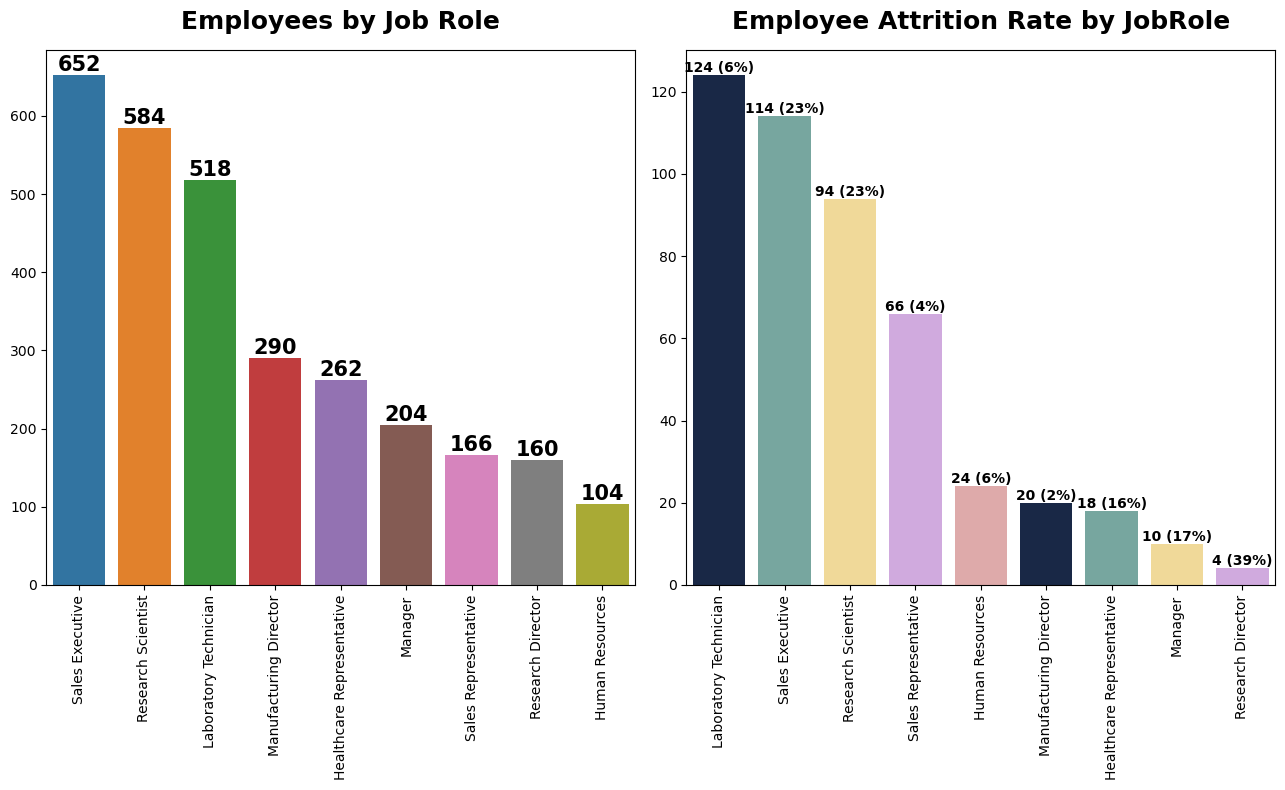

In [56]:
##Visualization to show Total Employees by JobRole.
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
value_1 = df["JobRole"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values)
plt.title("Employees by Job Role",fontweight="black",pad=15,size=18)
plt.xticks(rotation=90)
for index, value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)

    
#Visualization to show Attrition Rate by JobRole.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["JobRole"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition Rate by JobRole",fontweight="black",pad=15,size=18)
plt.xticks(rotation=90)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             fontweight="black",size=10)

plt.tight_layout()
plt.show()

Highest attrition rates are in sector of Research Director, Sales Executive, Research Scientist

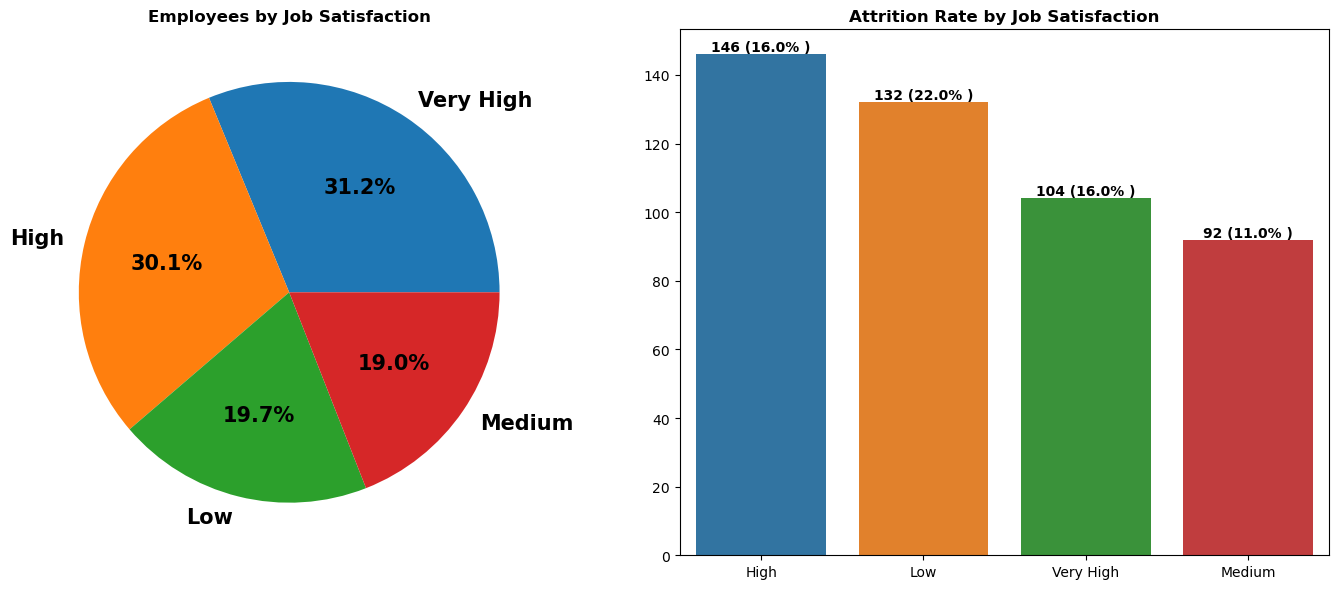

In [59]:
#Visualization to show Total Employees by Job Satisfaction.

df["JobSatisfaction"] = df["JobSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["JobSatisfaction"].value_counts()
plt.title("Employees by Job Satisfaction", fontweight="black", size=12)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",textprops={"fontweight":"black","size":15})
    
#Visualization to show Attrition Rate by Job Satisfaction.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["JobSatisfaction"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index)
plt.title("Attrition Rate by Job Satisfaction",fontweight="black",size=12)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=10,fontweight="black")
plt.tight_layout()
plt.show()

1. Most of the employees have rated their job satisfaction as high or very high.
2. Employees who rated their job satisfaction low are mostly leaving the organization.

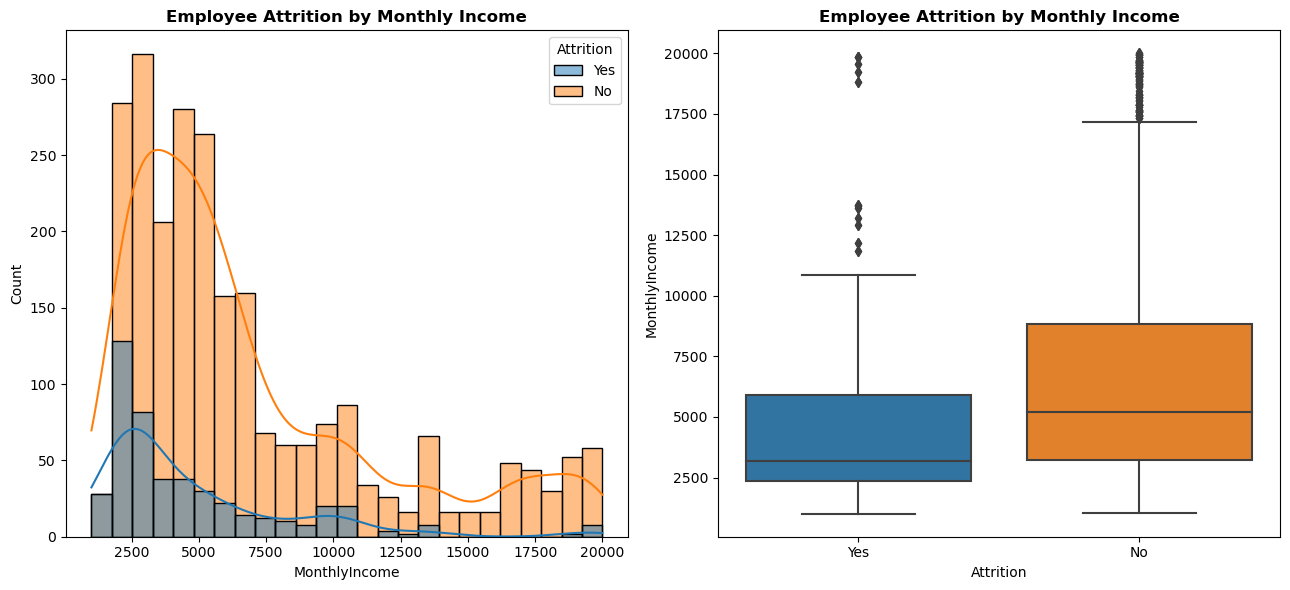

In [60]:

#Employee Distribution by MonthlyIncome.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(x="MonthlyIncome", hue="Attrition", kde=True ,data=df)
plt.title("Employee Attrition by Monthly Income",fontweight="black",size=12)

#Employee Attrition by MonthlyIncome.
plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="MonthlyIncome",data=df)
plt.title("Employee Attrition by Monthly Income",fontweight="black",size=12)
plt.tight_layout()
plt.show()

1. The average monthly income of employee who have left is comparatively low with employee who are still working.
2. As the Monthly Income increases the attrition decreases.

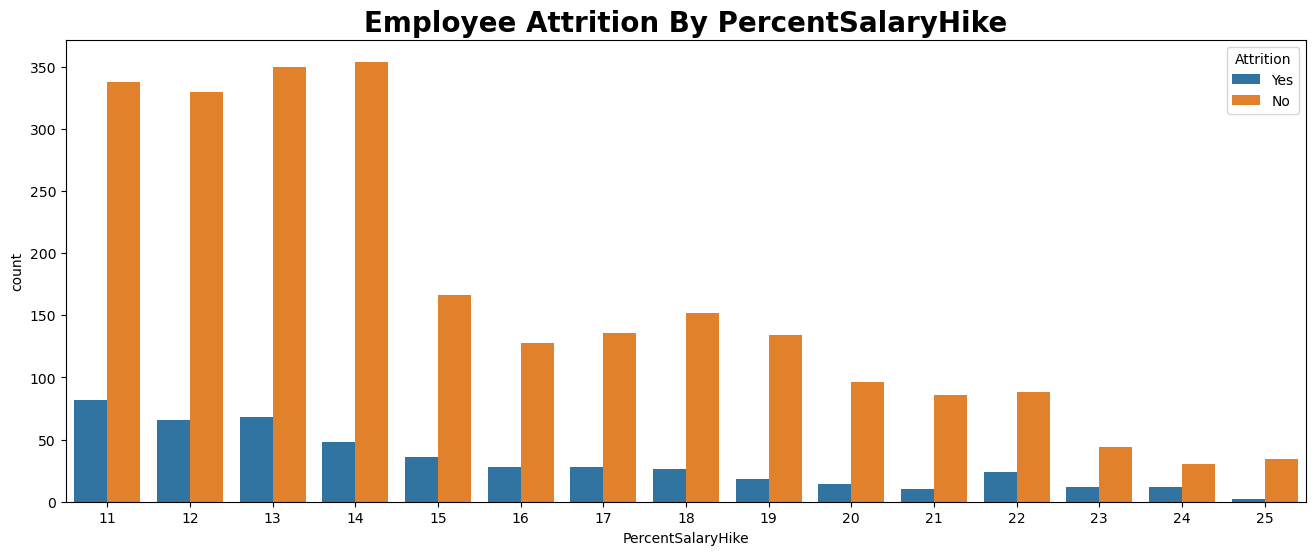

In [62]:
#Visualization to show Employee Distribution by Percentage Salary Hike.
plt.figure(figsize=(16,6))
sns.countplot(x="PercentSalaryHike", hue="Attrition", data=df)
plt.title("Employee Attrition By PercentSalaryHike",fontweight="black",size=20)
plt.show()

As the amount of percent salary increases the attrition rate decreases.

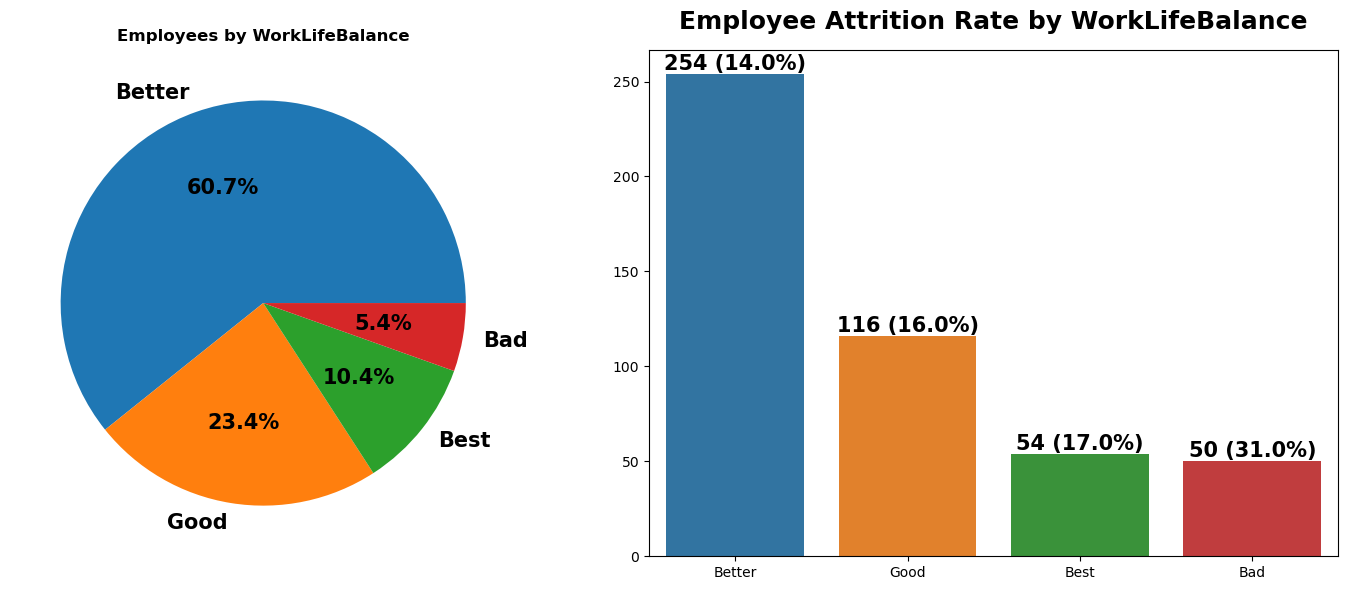

In [67]:
##Visualization to show Total Employees by WorkLifeBalance.
df["WorkLifeBalance"] = df["WorkLifeBalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})

plt.figure(figsize=(14.5,6))
plt.subplot(1,2,1)
value_1 = df["WorkLifeBalance"].value_counts()
plt.title("Employees by WorkLifeBalance", fontweight="black", size=12)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",textprops={"fontweight":"black","size":15})

#Visualization to show Attrition Rate by WorkLifeBalance.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["WorkLifeBalance"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,order=value_2.index)
plt.title("Employee Attrition Rate by WorkLifeBalance",fontweight="black",pad=15,size=18)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=15)
plt.tight_layout()
plt.show()

1. More than 60% of employees are having a better work life balance.
2. Employees with Bad Work Life Balance is having Very High Attrition Rate.

In [79]:
#Analyzing Employee Attrition by Years Since Last Promotion.
df.YearsSinceLastPromotion.value_counts().sort_index()

0-1 years     714
2-5 years     634
6-10 years    298
10+ years     132
Name: YearsSinceLastPromotion, dtype: int64

In [76]:
df.YearsSinceLastPromotion.describe()

count    2940.000000
mean        2.187755
std         3.221882
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

In [77]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '6-10 years', "10+ years"]

# Cut the DailyRate column into groups
df["YearsSinceLastPromotion"] = pd.cut(df['YearsSinceLastPromotion'], bins=bin_edges, labels=bin_labels)

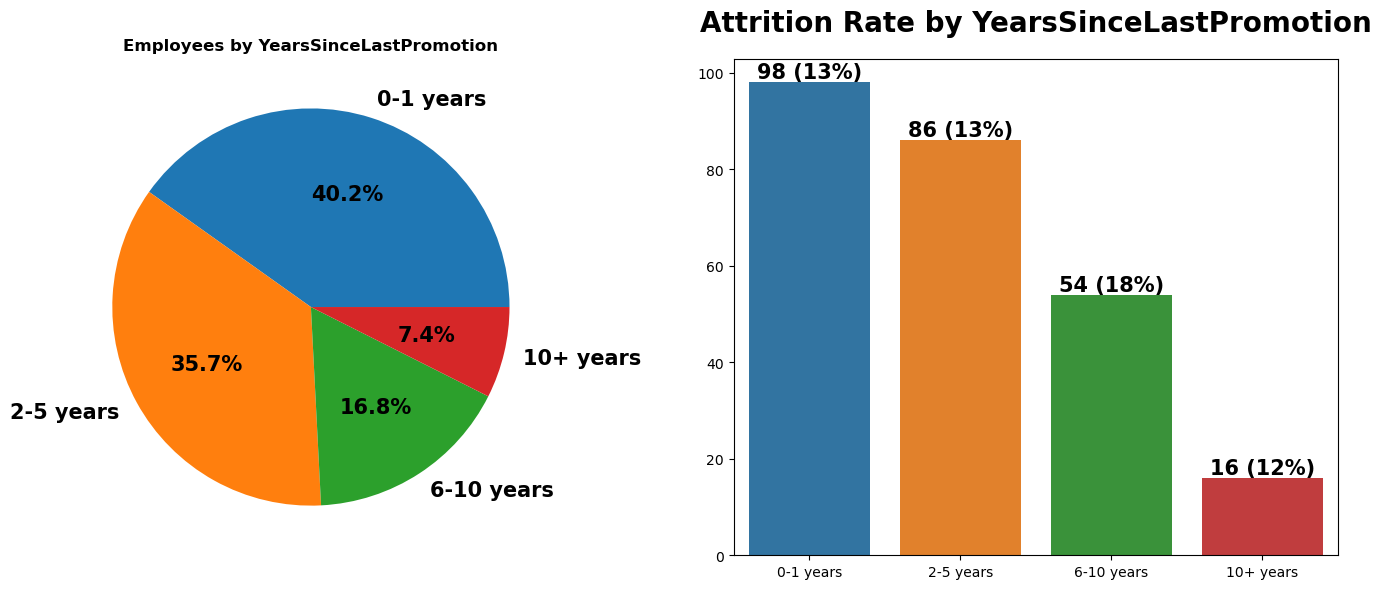

In [78]:
#Visualization to show Total Employees by YearsSinceLastPromotionGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["YearsSinceLastPromotion"].value_counts()
plt.title("Employees by YearsSinceLastPromotion", fontweight="black", size=12)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",textprops={"fontweight":"black","size":15})
    
#Visualization to show Attrition Rate by YearsSinceLastPromotionGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["YearsSinceLastPromotion"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values)

plt.title("Attrition Rate by YearsSinceLastPromotion",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

1. Almost 7% of employees has not been promoted since 10+ years.
2. All the categories in this feature is having high attrition rate specially employee who has not been promoted since 5+ years.

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

In [7]:
le=LabelEncoder()

lst=['Attrition', 'BusinessTravel', 'Department',
       'EducationField', 'Gender', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'Over18', 'OverTime']

for i in lst:
    df[i]=le.fit_transform(df[i])

In [8]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany

In [9]:
X=df.drop(['Attrition'],axis=1)
y=df.iloc[:,1]

In [10]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [11]:
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


#### Train-Test Split

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Random Forest

In [15]:
rf = RandomForestClassifier(random_state=42)

In [114]:
#To look at the available hyperparameters, we can create a random forest and examine the default values.

print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [16]:
#View the parameters in more readable format

print('Parameters currently in use:\n')
for key, value in rf.get_params().items():
    print(f"{key}: {value}")

Parameters currently in use:

bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


In [ ]:
"""
We will try adjusting the following set of hyperparameters:

1.n_estimators = number of trees in the foreset
2.max_features = max number of features considered for splitting a node
3.max_depth = max number of levels in each decision tree
4.min_samples_split = min number of data points placed in a node before the node is split
5.min_samples_leaf = min number of data points allowed in a leaf node
6.bootstrap = method for sampling data points (with or without replacement)
"""

Hyper-Parameter Optimization using GridSearchCV

In [20]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2,3,4,5,6,7,8],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini'],
              'min_samples_leaf': [2, 3, 4, 5],
              'min_samples_split': [4,5,6, 8, 10]
             }

cv_rf = GridSearchCV(rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Time taken in grid search:  1631.05


In [21]:
# Set best parameters given by grid search 
rf.set_params(criterion = 'gini',
              max_features = None, 
              max_depth = 8,
              min_samples_leaf = 2,
              min_samples_split = 5)

RandomForestClassifier(max_depth=8, max_features=None, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

In [22]:
#calculating OOB Rate

rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rf.set_params(n_estimators=i)
    rf.fit(X_train, y_train)

    oob_error = 1 - rf.oob_score_
    error_rate[i] = oob_error

In [23]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

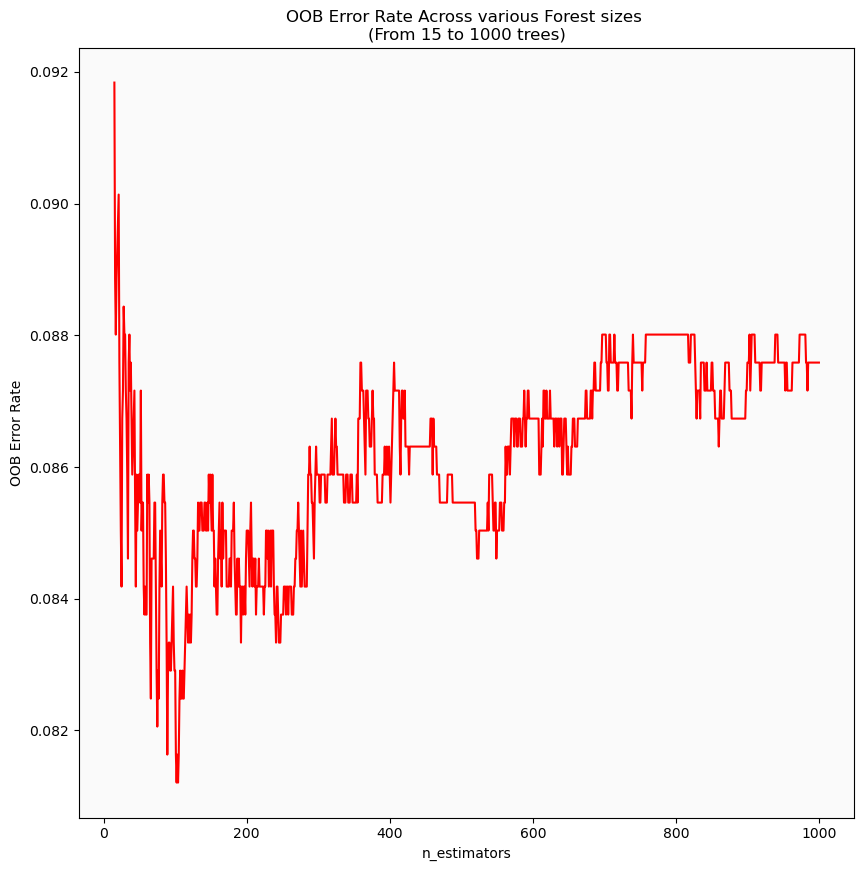

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [25]:
print('OOB Error rate for 700 trees is: {0:.5f}'.format(oob_series[700]))

OOB Error rate for 700 trees is: 0.08801


In [27]:
# Refine the tree via OOB Output
rf.set_params(n_estimators=700,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=8, max_features=None, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=700, random_state=42)

Train the RandomForest

In [28]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=None, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=700, random_state=42)

Predictions

In [ ]:
predictions_rf = rf.predict(X_test)

Confusion Matrix

In [19]:
def create_conf_mat(y_test, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(y_test.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

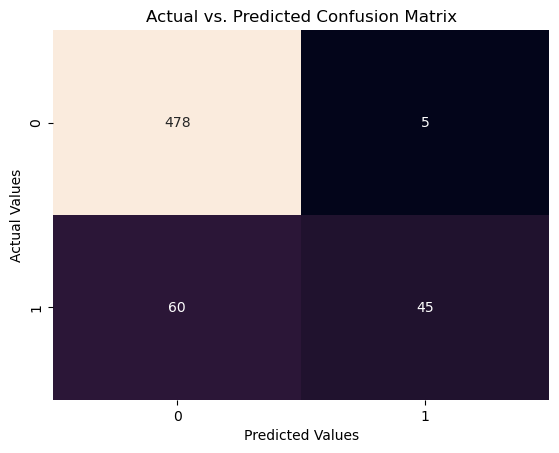

In [35]:
conf_mat = create_conf_mat(y_test, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [44]:
#Accuracy
print("The accuracy is {:.2f}".format(accuracy_score(y_test, predictions_rf)))

The accuracy is 0.89


Area Under Curve (AUC)

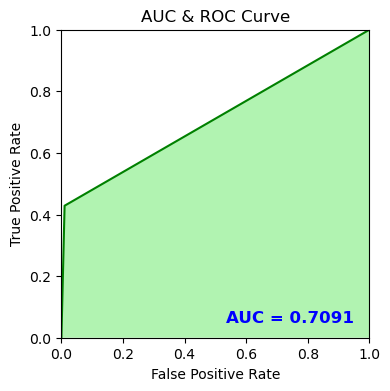

In [51]:
from sklearn import metrics
auc = roc_auc_score(y_test, predictions_rf)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predictions_rf)

plt.figure(figsize=(8, 4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [48]:

print("The AUC ROC Score is {:.2f}".format(roc_auc_score(y_test, predictions_rf)))


The AUC ROC Score is 0.71


Classification Report

In [22]:
def print_class_report(predictions, alg_name):
    """
    Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn. 
    """
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions, 
            y_test))

In [61]:
class_report = print_class_report(predictions_rf, 'Random Forest')

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       538
           1       0.43      0.90      0.58        50

    accuracy                           0.89       588
   macro avg       0.71      0.89      0.76       588
weighted avg       0.94      0.89      0.91       588



### Logistic Regression

In [25]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression()

Predictions

In [26]:
y_pred=logreg.predict(X_test)

Performance & Accuracy

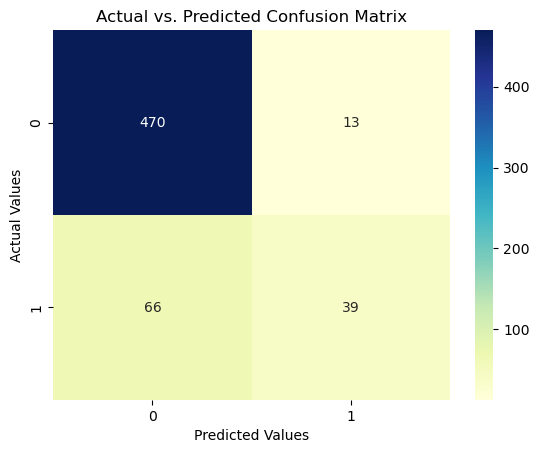

In [69]:
confusion_mat = create_conf_mat(y_test,y_pred)
sns.heatmap(confusion_mat, annot=True, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [70]:
#Accuracy
print("The accuracy is {:.2f}".format(accuracy_score(y_test, y_pred)))

The accuracy is 0.87


Area Under Curve (AUC)

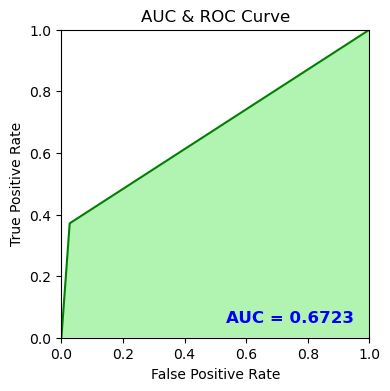

In [73]:
auc = roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [72]:
print("The AUC ROC Score is {:.2f}".format(roc_auc_score(y_test, y_pred)))

The AUC ROC Score is 0.67


In [27]:
class_report = print_class_report(y_pred, 'Logistic Regression')

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       536
           1       0.37      0.75      0.50        52

    accuracy                           0.87       588
   macro avg       0.67      0.81      0.71       588
weighted avg       0.92      0.87      0.88       588



#### Support Vector Machine - SVM

Hyper-Parameter Optimization using GridSearchCV

In [14]:
tuned_parameters =[
    {"kernel":
        ["linear"],
        "C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]},
    {"kernel":
        ["poly"],
        "degree": [2, 3, 4],
        "C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]},
    {"kernel":
        ["rbf"],
        "gamma": ["auto", "scale"],
        "C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
]

model_svm = GridSearchCV(SVC(), tuned_parameters,cv=10,scoring='accuracy')

model_svm.fit(X_train, y_train)

print(model_svm.best_estimator_)


SVC(C=100)


In [31]:
#Accuracy
grid_predictions = model_svm.predict(X_test)
print("The accuracy is {:.2f}".format(accuracy_score(y_test, grid_predictions)))
print("The auc is {:.2f}".format(roc_auc_score(y_test, grid_predictions)))
print("The recall is {:.2f}".format(recall_score(y_test, grid_predictions)))
print("The precision is {:.2f}".format(precision_score(y_test, grid_predictions)))
print("The f1_score is {:.2f}".format(f1_score(y_test, grid_predictions)))

The accuracy is 0.94
The auc is 0.89
The recall is 0.81
The precision is 0.87
The f1_score is 0.84


Confusion Matrix

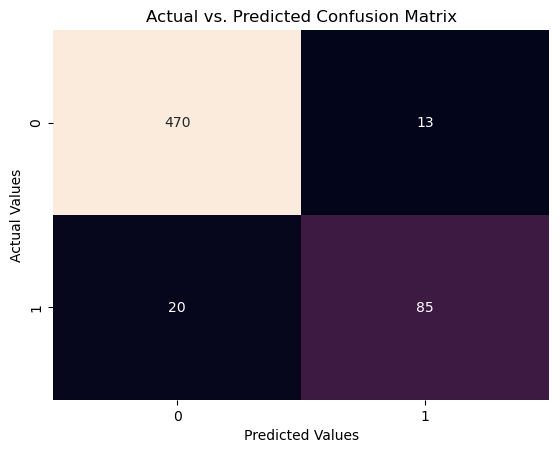

In [20]:
conf_mat = create_conf_mat(y_test, grid_predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [28]:
class_report = print_class_report(grid_predictions, 'SVM')

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       490
           1       0.81      0.87      0.84        98

    accuracy                           0.94       588
   macro avg       0.89      0.91      0.90       588
weighted avg       0.95      0.94      0.94       588

